# Hu_moments

In [20]:
import sys;
sys.path.append("/Users/Giatti/Desktop/AI篆刻") 


In [21]:
import os
print(os.path.abspath('.')) # 得到当前文件所在目录的绝对路径


/Users/Giatti/Desktop/AI篆刻


(75, 75)
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


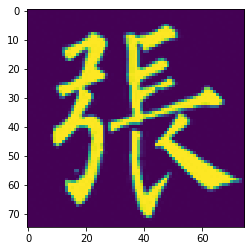

In [22]:
fp = 'Zhang.png'
img = cv2.imread(fp)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = img_gray[10:85,10:85]

print(img_gray.shape)
print(img_gray)
plt.imshow(img_gray)
plt.show()

In [23]:
#-*-coding:utf-8-*-
import cv2
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
    
def test(img):
    moments = cv2.moments(img)
    humoments = cv2.HuMoments(moments)
    # humoments = no.log(np.abs(humoments)) # 同样建议取对数
    print(humoments)
 
# if __name__ == '__main__':
#     t1 = datetime.now()   
#     fp = './ImageMoments/Zhang.png'
#     img = cv2.imread(fp)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     test(img_gray)
#     print (datetime.now() - t1)

test(img_gray)

[[ 1.88615464e-03]
 [ 1.46693843e-07]
 [ 3.88340372e-10]
 [ 5.29172259e-11]
 [ 4.69315915e-21]
 [ 1.84746096e-14]
 [-5.95976069e-21]]


In [24]:
#-*-coding:utf-8-*-
import cv2
from datetime import datetime
import numpy as np
# np.set_printoptions(suppress=True)
 
def humoments(img_gray):
    '''
    由于7个不变矩的变化范围很大,为了便于比较,可利用取对数的方法进行数据压缩;同时考虑到不变矩有可能出现负值的情况,因此,在取对数之前先取绝对值
    经修正后的不变矩特征具有平移 、旋转和比例不变性
    '''
    # 标准矩定义为m_pq = sumsum(x^p * y^q * f(x, y))
    row, col = img_gray.shape
    #计算图像的0阶几何矩
    m00 = img_gray.sum()
    m10 = m01 = 0
    #　计算图像的二阶、三阶几何矩
    m11 = m20 = m02 = m12 = m21 = m30 = m03 = 0
    for i in range(row):
        m10 += (i * img_gray[i]).sum()
        m20 += (i ** 2 * img_gray[i]).sum()
        m30 += (i ** 3 * img_gray[i]).sum()
        for j in range(col):
            m11 += i * j * img_gray[i][j]
            m12 += i * j ** 2 * img_gray[i][j]
            m21 += i ** 2 * j * img_gray[i][j]
    for j in range(col):
        m01 += (j * img_gray[:, j]).sum()
        m02 += (j ** 2 * img_gray[:, j]).sum()
        m30 += (j ** 3 * img_gray[:, j]).sum()
        
    # 由标准矩我们可以得到图像的"重心"
    u10 = m10 / m00
    u01 = m01 / m00
    
    # 计算图像的二阶中心矩、三阶中心矩
    y00 = m00
    y10 = y01 = 0
    y11 = m11 - u01 * m10
    y20 = m20 - u10 * m10
    y02 = m02 - u01 * m01
    y30 = m30 - 3 * u10 * m20 + 2 * u10 ** 2 * m10
    y12 = m12 - 2 * u01 * m11 - u10 * m02 + 2 * u01 ** 2 * m10
    y21 = m21 - 2 * u10 * m11 - u01 * m20 + 2 * u10 ** 2 * m01
    y03 = m03 - 3 * u01 * m02 + 2 * u01 ** 2 * m01
    
    # 计算图像的归格化中心矩
    n20 = y20 / m00 ** 2
    n02 = y02 / m00 ** 2
    n11 = y11 / m00 ** 2
    n30 = y30 / m00 ** 2.5
    n03 = y03 / m00 ** 2.5
    n12 = y12 / m00 ** 2.5
    n21 = y21 / m00 ** 2.5
    
    # 计算图像的七个不变矩
    h1 = n20 + n02
    h2 = (n20 - n02) ** 2 + 4 * n11 ** 2
    h3 = (n30 - 3 * n12) ** 2 + (3 * n21 - n03) ** 2
    h4 = (n30 + n12) ** 2 + (n21 + n03) ** 2
    h5 = (n30 - 3 * n12) * (n30 + n12) * ((n30 + n12) ** 2 - 3 * (n21 + n03) ** 2) + (3 * n21 - n03) * (n21 + n03) \
        * (3 * (n30 + n12) ** 2 - (n21 + n03) ** 2)
    h6 = (n20 - n02) * ((n30 + n12) ** 2 - (n21 + n03) ** 2) + 4 * n11 * (n30 + n12) * (n21 + n03)
    h7 = (3 * n21 - n03) * (n30 + n12) * ((n30 + n12) ** 2 - 3 * (n21 + n03) ** 2) + (3 * n12 - n30) * (n21 + n03) \
        * (3 * (n30 + n12) ** 2 - (n21 + n03) ** 2)
    inv_m7 = [h1, h2, h3, h4, h5, h6, h7]
    inv_m7 = np.log(np.abs(inv_m7))
    return inv_m7
 
# if __name__ == '__main__':
#     t1 = datetime.now()
#     fp = '/home/mamq/images/3.jpg'
#     img = cv2.imread(fp)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print humoments(img_gray)
#     print datetime.now() - t1

In [25]:
print(humoments(img_gray))

[ -6.79940297  -9.26511255 -13.37535319 -13.27805971 -27.06571351
 -18.45685442 -26.85831966]


In [26]:
def m_pq(f, p, q):
    """
    Two-dimensional (p+q)th order moment of image f(x,y)
    where p,q = 0, 1, 2, ...
    """
    m = 0
    # Loop in f(x,y)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            # +1 is used because if it wasn't, the first row and column would
            # be ignored
            m += ((x+1)**p)*((y+1)**q)*f[x][y]
    return m


def centroid(f):
    """
    Computes the centroid of image f(x,y)
    """
    m_00 = m_pq(f, 0, 0)
    return [m_pq(f, 1, 0)/m_00, m_pq(f, 0 ,1)/m_00]


def u_pq(f, p, q):
    """
    Centroid moment invariant to rotation.
    This function is equivalent to the m_pq but translating the centre of image
    f(x,y) to the centroid.
    """
    u = 0
    centre = centroid(f)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            u += ((x-centre[0]+1)**p)*((y-centre[1]+1)**q)*f[x][y]
    return u


def hu(f):
    """
    This function computes Hu's seven invariant moments.
    """
    u_00 = u_pq(f, 0, 0)

    # Scale invariance is obtained by normalization.
    # The normalized central moment is given below
    eta = lambda f, p, q: u_pq(f, p, q)/(u_00**((p+q+2)/2))

    # normalized central moments used to compute Hu's seven moments invariat
    eta_20 = eta(f, 2, 0)
    eta_02 = eta(f, 0, 2)
    eta_11 = eta(f, 1, 1)
    eta_12 = eta(f, 1, 2)
    eta_21 = eta(f, 2, 1)
    eta_30 = eta(f, 3, 0)
    eta_03 = eta(f, 0, 3)

    # Hu's moments are computed below
    phi_1 = eta_20 + eta_02
    phi_2 = 4*eta_11 + (eta_20-eta_02)**2
    phi_3 = (eta_30 - 3*eta_12)**2 + (3*eta_21 - eta_03)**2
    phi_4 = (eta_30 + eta_12)**2 + (eta_21 + eta_03)**2
    phi_5 = (eta_30 - 3*eta_12)*(eta_30 + eta_12)*((eta_30+eta_12)**2 - 3*(eta_21+eta_03)**2) + (3*eta_21 - eta_03)*(eta_21 + eta_03)*(3*(eta_30 + eta_12) - (eta_21 + eta_03)**2)
    phi_6 = (eta_20 - eta_02)*((eta_30 + eta_12)**2 - (eta_21 + eta_03)**2) + 4*eta_11*(eta_30 + eta_12)*(eta_21 + eta_03)
    phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2) - (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)

    return [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7]